<a href="https://colab.research.google.com/github/fasihfast/demand_forecasting_for_retail/blob/main/Demand_Forecasting_Retail_using_Historical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**About DataSet**
This a data set comprising of 169211 entries of Retail Store's different WareHouses.This data set is a 12 months dataset year 2016 having 169211 unique products

## Data loading


Load the "Retail_Dataset2.csv" file.


In [21]:
import pandas as pd

try:
    df_org = pd.read_csv('Retail_Dataset2.csv')
    df=df_org.copy()
    display(df.head())
except FileNotFoundError:
    print("Error: 'Retail_Dataset2.csv' not found.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


## Data exploration


Explore the dataset to understand its structure, identify missing values, data types of columns, and the distribution of key variables. Determine the target variable for demand forecasting.


Checking the data types, descriptive statistics, missing values, and the distribution of the target variable ('Order_Demand').



In [22]:
df.shape

(169211, 11)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product_id        169211 non-null  int64 
 1   Product_Code      169211 non-null  object
 2   Warehouse         169211 non-null  object
 3   Product_Category  169211 non-null  object
 4   Date              169211 non-null  object
 5   Order_Demand      169211 non-null  int64 
 6   Open              169211 non-null  int64 
 7   Promo             169211 non-null  int64 
 8   StateHoliday      169211 non-null  object
 9   SchoolHoliday     169211 non-null  int64 
 10  Petrol_price      169211 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 14.2+ MB


In [24]:
df.describe()

,Product_id,Order_Demand,Open,Promo,SchoolHoliday,Petrol_price
count,1.692110e+05,1.692110e+05,169211.000000,169211.000000,169211.000000,169211.000000
mean,9.528887e+05,5.248118e+03,0.817742,0.395364,0.133401,87.986183
std,5.555751e+04,3.116296e+04,0.386058,0.488930,0.340009,4.909978
min,6.909430e+05,0.000000e+00,0.000000,0.000000,0.000000,80.000000
25%,9.054275e+05,2.000000e+01,1.000000,0.000000,0.000000,84.000000
50%,9.526430e+05,3.000000e+02,1.000000,0.000000,0.000000,88.000000
75%,1.001416e+06,2.000000e+03,1.000000,1.000000,0.000000,92.000000
max,1.048574e+06,2.500000e+06,1.000000,1.000000,1.000000,96.000000


In [25]:
df[(df['Open'] == 0) & (df['Order_Demand'] > 0)]

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
431,893398,Product_1359,Whse_J,Category_019,01/05/2016,5000,0,0,0,0,89
812,1031412,Product_0020,Whse_J,Category_005,01/05/2016,300,0,0,0,0,94
1546,861046,Product_0021,Whse_J,Category_005,01/06/2016,500,0,1,0,0,91
1927,1015052,Product_1456,Whse_J,Category_019,01/06/2016,500,0,1,0,0,86
1962,964947,Product_1455,Whse_J,Category_019,01/07/2016,5000,0,1,a,0,88
...,...,...,...,...,...,...,...,...,...,...,...
169205,869586,Product_0083,Whse_S,Category_019,11/23/2016,5000,0,0,a,1,91
169206,993496,Product_1368,Whse_A,Category_019,11/23/2016,1400,0,0,a,1,84
169207,869587,Product_0094,Whse_S,Category_019,11/23/2016,5000,0,0,a,1,80
169208,898180,Product_2074,Whse_A,Category_009,11/23/2016,40,0,0,a,1,81


In [26]:
df['Order_Demand'].value_counts()

,count
Order_Demand,
1000,18301
100,14026
1,9903
2000,8338
10000,8147
...,...
744000,1
5850,1
3350,1


In [27]:
import numpy as np
print(np.log1p(df['Order_Demand']))

0          9.680406
1         10.819798
2          8.006701
3          6.908755
4          2.079442
            ...    
169206     7.244942
169207     8.517393
169208     3.713572
169209     2.397895
169210     0.000000
Name: Order_Demand, Length: 169211, dtype: float64


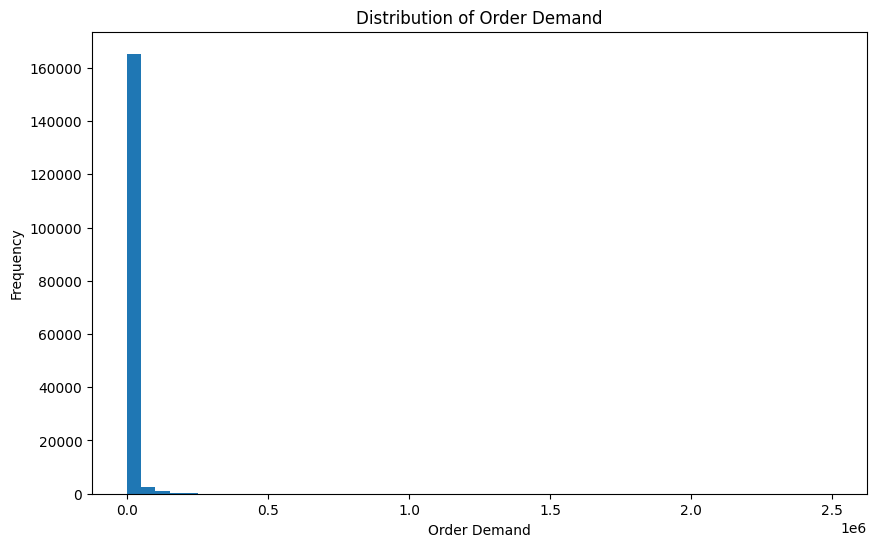

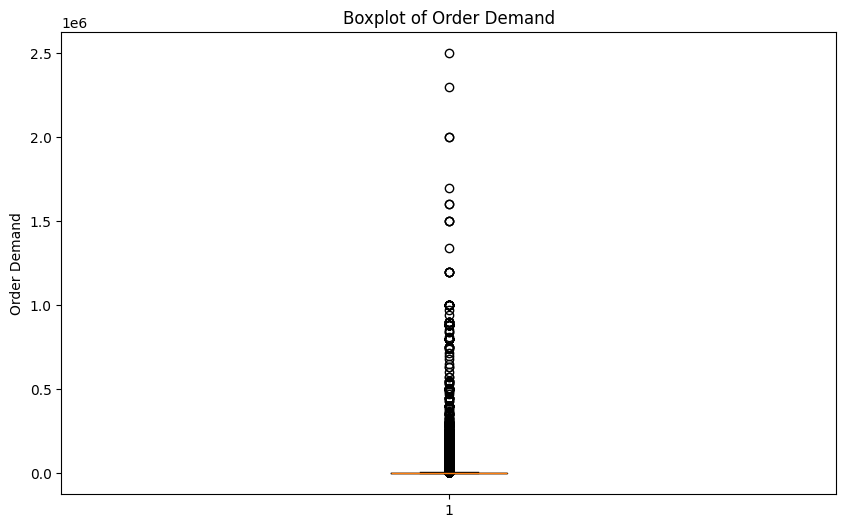

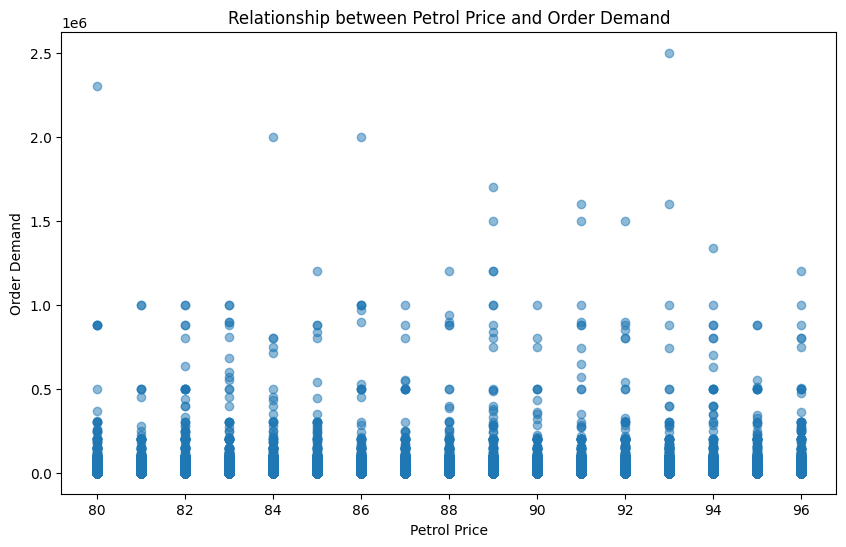

In [28]:
# Analyze the distribution of the target variable
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Order_Demand'], bins=50)
plt.xlabel('Order Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Order Demand')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['Order_Demand'])
plt.ylabel('Order Demand')
plt.title('Boxplot of Order Demand')
plt.show()

# Explore relationships between target and other features (example with 'Petrol_price')
plt.figure(figsize=(10, 6))
plt.scatter(df['Petrol_price'], df['Order_Demand'], alpha=0.5)  # Adjust alpha for visibility
plt.xlabel('Petrol Price')
plt.ylabel('Order Demand')
plt.title('Relationship between Petrol Price and Order Demand')
plt.show()

## Data cleaning


Clean the data by handling outliers in the 'Order_Demand' column and converting the 'Date' column to datetime objects.


<ipython-input-29-ac60c7366ce3>:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


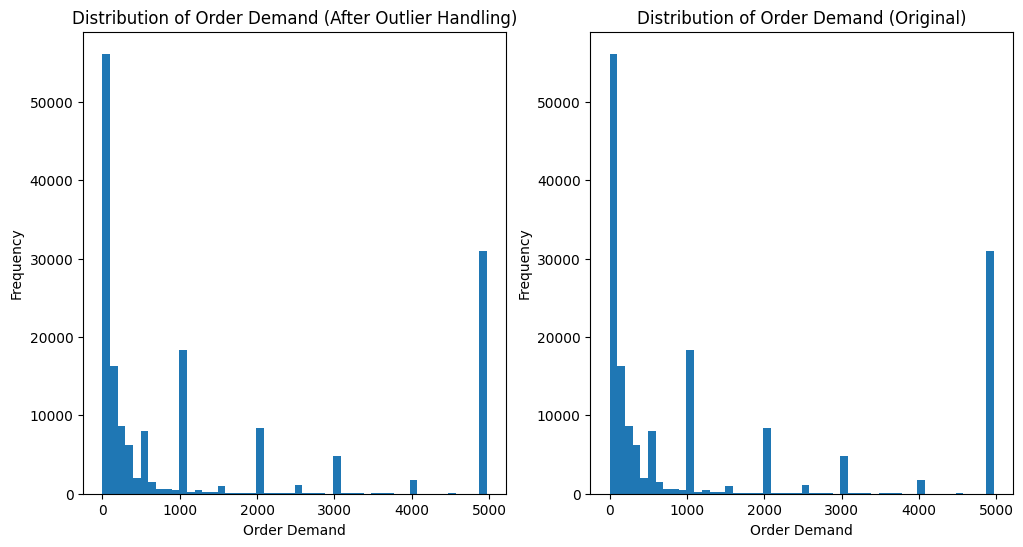

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate IQR for 'Order_Demand'
Q1 = df['Order_Demand'].quantile(0.25)
Q3 = df['Order_Demand'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Order_Demand'] = df['Order_Demand'].clip(lower=lower_bound, upper=upper_bound)

# Visualize 'Order_Demand' distribution before and after outlier handling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Order_Demand'], bins=50)
plt.xlabel('Order Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Order Demand (After Outlier Handling)')

# Convert 'Date' to datetime objects, handling various formats
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
    # Attempt to convert the remaining invalid dates using a more flexible format
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
except ValueError as e:
    print(f"Error converting 'Date' column: {e}")

plt.subplot(1,2,2)
plt.hist(df['Order_Demand'], bins=50)
plt.xlabel('Order Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Order Demand (Original)')
plt.show()

#**EDA**

<ipython-input-30-61eab9609c48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Product_Code",data=df[: 30],palette="summer")


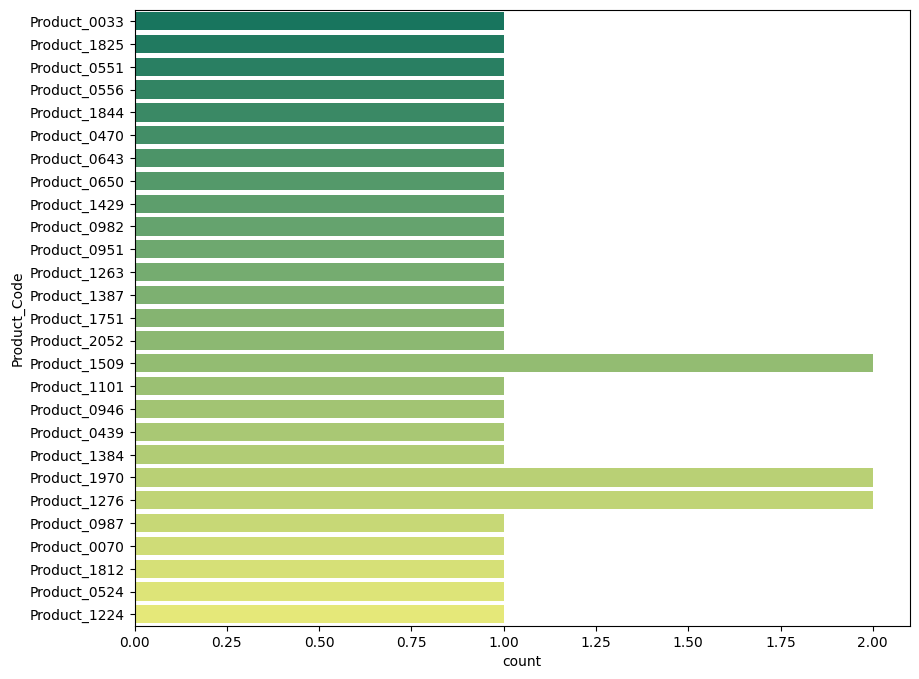

In [30]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(y="Product_Code",data=df[: 30],palette="summer")
plt.show()

<ipython-input-31-5951811f54a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Warehouse",data=df,palette="winter")


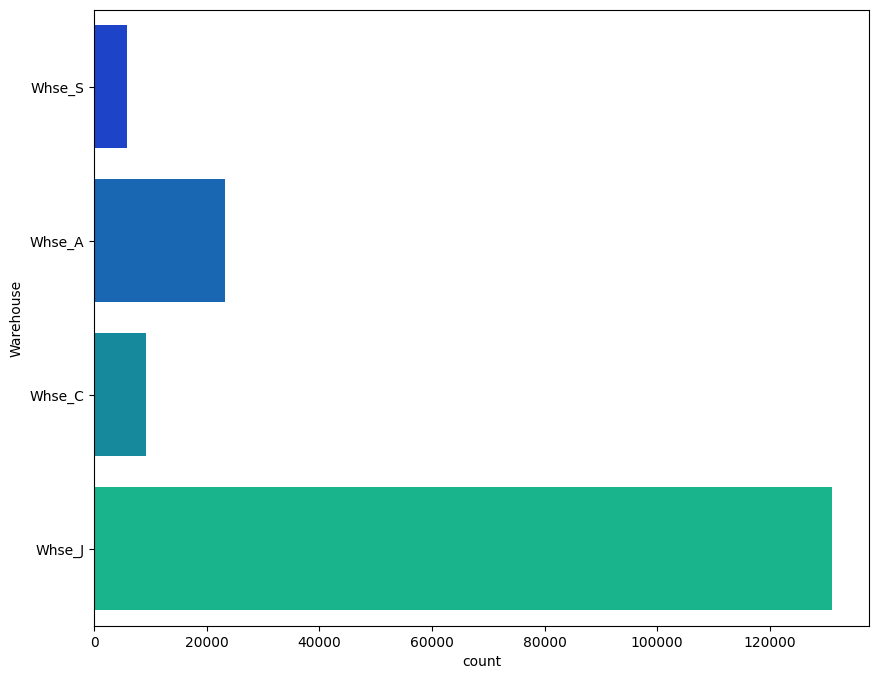

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(y="Warehouse",data=df,palette="winter")
plt.show()

<ipython-input-32-ae39674884e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Product_Category",data=df,palette="hot")


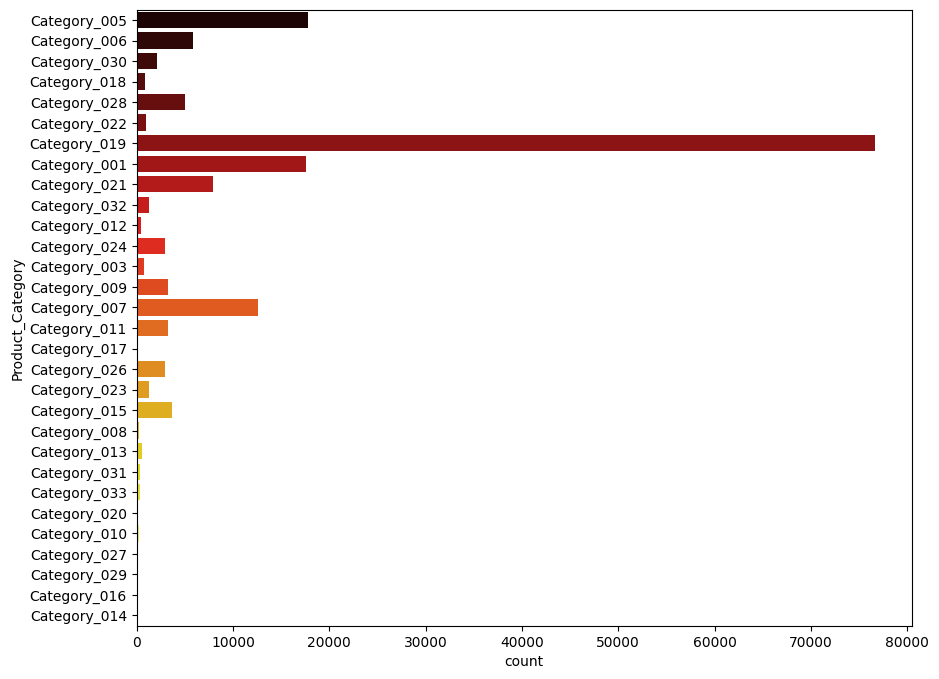

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(y="Product_Category",data=df,palette="hot")
plt.show()

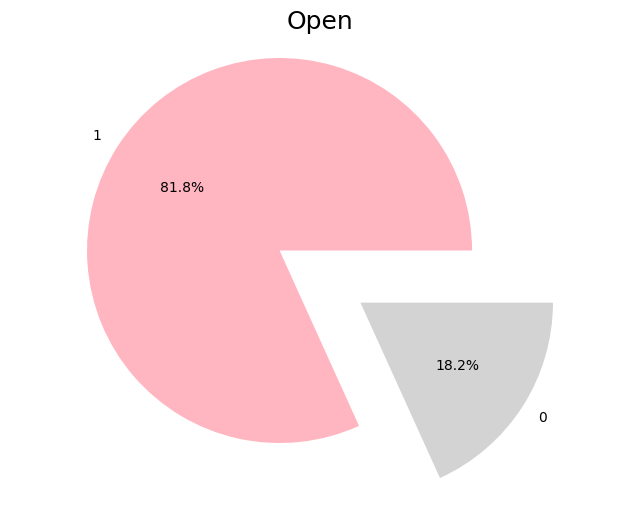

In [33]:
plt.figure(figsize=(8,6))
myexplode = [0.2, 0.3]
op= df['Open'].value_counts()
plt.pie(op.values, labels=op.index, autopct= '%1.1f%%', colors=['lightpink','lightgrey'],explode=myexplode)
plt.axis("equal")
plt.title('Open',fontsize=18)
plt.show()

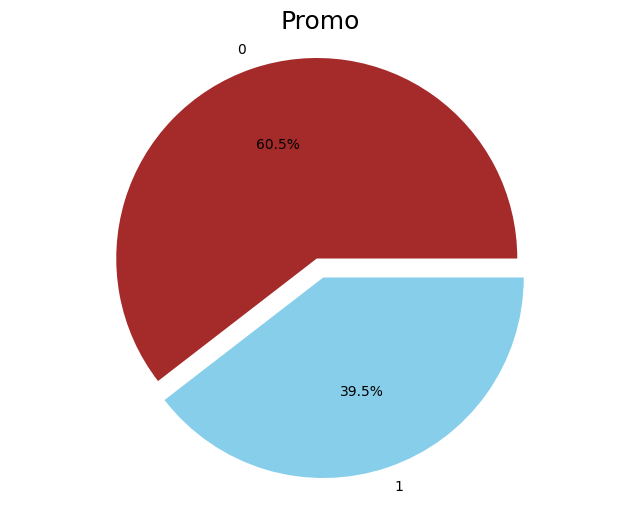

In [34]:
plt.figure(figsize=(8,6))
myexplode = [0.1, 0.0]
pro= df['Promo'].value_counts()
plt.pie(pro.values, labels=pro.index, autopct= '%1.1f%%', colors=['brown','skyblue'],explode=myexplode)
plt.axis("equal")
plt.title('Promo',fontsize=18)
plt.show()

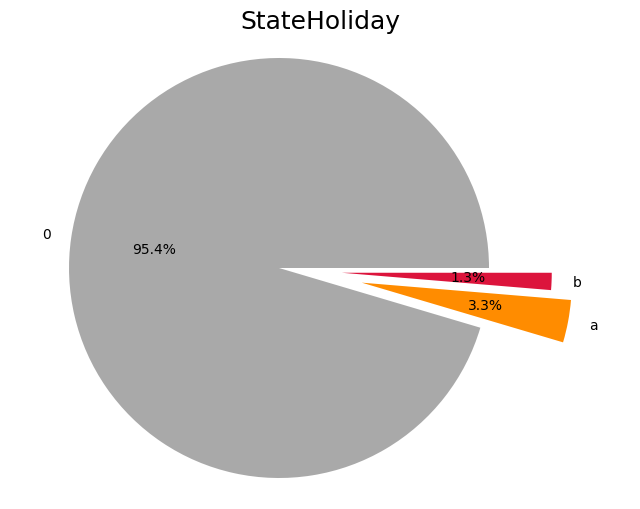

In [35]:
plt.figure(figsize=(8,6))
myexplode = [0.1, 0.3,0.2]
state= df['StateHoliday'].value_counts()
plt.pie(state.values, labels=state.index, autopct= '%1.1f%%', colors=['darkgrey','darkorange',"crimson"],explode=myexplode)
plt.axis("equal")
plt.title('StateHoliday',fontsize=18)
plt.show()

## Data wrangling

Extracting Features from Date and Performed onehot encoding on categorical columns


In [36]:
import pandas as pd

# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['IsHolidaySeason'] = df['Month'].isin([11, 12]).astype(int)

# One-hot encode categorical features
categorical_cols = ['Product_Category', 'Warehouse', 'Product_Code']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())

,Product_id,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,Year,Month,...,Product_Code_Product_2163,Product_Code_Product_2164,Product_Code_Product_2165,Product_Code_Product_2166,Product_Code_Product_2167,Product_Code_Product_2168,Product_Code_Product_2169,Product_Code_Product_2170,Product_Code_Product_2171,Product_Code_Product_2172
0,786725,2016-03-01,4970,1,0,0,0,91,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False
1,786743,2016-03-01,4970,1,0,0,0,85,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False
2,786967,2016-03-01,3000,1,0,0,0,85,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False
3,786856,2016-03-01,1000,1,0,0,0,93,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False
4,899538,2016-03-01,7,1,0,0,0,95,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False


## Feature engineering

Further refine features for demand forecasting.  Scale numerical features and create interaction terms.


In [37]:
df['Order_Demand'] = np.log1p(df['Order_Demand'])


In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Identify numerical features to scale
numerical_features = ['Petrol_price', 'Order_Demand', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear']

# Normailzation of numerical cols b/w to scale down them in range:[0,1]
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# Create interaction terms
df['PromoSchoolHoliday'] = df['Promo'] * df['SchoolHoliday']
df['MonthDayOfWeek'] = df['Month'] * df['DayOfWeek']

# Remove original features after creating interactions (optional but often helpful)
df = df.drop(['Promo', 'SchoolHoliday', 'Month', 'DayOfWeek'], axis=1)


display(df.head())

,Product_id,Date,Order_Demand,Open,StateHoliday,Petrol_price,Year,Day,WeekOfYear,IsHolidaySeason,...,Product_Code_Product_2165,Product_Code_Product_2166,Product_Code_Product_2167,Product_Code_Product_2168,Product_Code_Product_2169,Product_Code_Product_2170,Product_Code_Product_2171,Product_Code_Product_2172,PromoSchoolHoliday,MonthDayOfWeek
0,786725,2016-03-01,1.000000,1,0,0.6875,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0,0.030303
1,786743,2016-03-01,1.000000,1,0,0.3125,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0,0.030303
2,786967,2016-03-01,0.940706,1,0,0.3125,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0,0.030303
3,786856,2016-03-01,0.811708,1,0,0.8125,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0,0.030303
4,899538,2016-03-01,0.244313,1,0,0.9375,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0,0.030303


In [39]:
df['Is_Internal_Movement'] = ((df['Open'] == 0) & (df['Order_Demand'] > 0)).astype(int)
print(df['Is_Internal_Movement'].head())

0    0
1    0
2    0
3    0
4    0
Name: Is_Internal_Movement, dtype: int64


In [40]:
df['Is_Internal_Movement'].value_counts()

,count
Is_Internal_Movement,
0,138963
1,30248


In [41]:
df['StateHoliday'].value_counts()

,count
StateHoliday,
0,161447
a,5534
b,2230


In [42]:
df['StateHoliday'].replace({'a': 1, 'b': 2}, inplace=True)

<ipython-input-42-626388b3906a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['StateHoliday'].replace({'a': 1, 'b': 2}, inplace=True)


In [43]:
df['StateHoliday'].value_counts()

,count
StateHoliday,
0,161447
1,5534
2,2230


## Data splitting


Split the data into training, validation, and testing sets.


In [44]:
# from sklearn.model_selection import TimeSeriesSplit
# import pandas as pd
# import numpy as np

# # Sort the DataFrame by 'Date'
# df = df.sort_values(by='Date')

# # Define the target variable
# target_column = 'Order_Demand'

# # Separate features (X) and target (y)
# X = df.drop(target_column, axis=1)
# y = df[target_column]


# # Split the data into training, validation, and testing sets
# train_size = int(0.7 * len(df))
# val_size = int(0.15 * len(df))
# test_size = len(df) - train_size - val_size

# X_train, y_train = X[:train_size], y[:train_size]
# X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size+val_size]
# X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]


# # Print shapes of the datasets
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_val shape:", X_val.shape)
# print("y_val shape:", y_val.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

## Model training




Training the XGBRegressor, and LGBMRegressor models and evaluate their performance using Mean Absolute Error (MAE).



#T**o determine if your XGBoost and LGBBOOST model is neither overfitting nor underfitting**

Interpretation:

**Overfitting**: Training error much lower than testing error

**Underfitting**: Both errors are high and similar

**Good fit**: Both errors are low and relatively close

In [45]:
# # Calculate errors on both training and test sets
# y_train_pred = xgb_model.predict(X_train)
# y_test_pred = xgb_model.predict(X_test)

# train_mae = mean_absolute_error(y_train, y_train_pred)
# test_mae = mean_absolute_error(y_test, y_test_pred)

# print(f"Training MAE: {train_mae:.4f}")
# print(f"Testing MAE: {test_mae:.4f}")
# print(f"Difference: {abs(train_mae - test_mae):.4f}")

In [46]:
# y_train_pred = lgb_model.predict(X_train)
# y_test_pred = lgb_model.predict(X_test)

# train_mae = mean_absolute_error(y_train, y_train_pred)
# test_mae = mean_absolute_error(y_test, y_test_pred)

# print(f"Training MAE: {train_mae:.4f}")
# print(f"Testing MAE: {test_mae:.4f}")
# print(f"Difference: {abs(train_mae - test_mae):.4f}")

In [47]:
# from sklearn.model_selection import TimeSeriesSplit
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import lightgbm as lgb
# from sklearn.metrics import mean_absolute_error

# # ... (your existing code for data loading, preprocessing, and feature engineering)

# # Sort the DataFrame by 'Date'
# df = df.sort_values(by='Date')

# # Define the target variable
# target_column = 'Order_Demand'

# # Separate features (X) and target (y)
# X = df.drop(target_column, axis=1)
# y = df[target_column]

# # Create TimeSeriesSplit object
# tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits as needed

# # Initialize lists to store evaluation metrics
# mae_scores_xgb = []
# mae_scores_lgb = []

# for col in X.columns:
#   X[col] = pd.to_numeric(X[col], errors='coerce')
# X = X.fillna(0)

# train_size = int(0.8 * len(df))  # Adjust the percentage as needed
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # Loop through the folds for training and validation
# for train_index, val_index in tscv.split(X):
#     X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[val_index]
#     # print("train_index:",train_index,"val_index: ",val_index)

#     # Convert to numeric and fill NaN (as you did before)
# #     for col in X.columns:
# #         X[col] = pd.to_numeric(X[col], errors='coerce')
# #     for col in X_val.columns:
# #         X_val[col] = pd.to_numeric(X_val[col], errors='coerce')
# #     X_train = X_train.fillna(0)
# #     X_val = X_val.fillna(0)

# #     # Initialize and train XGBoost
#     xgb_model = xgb.XGBRegressor(enable_categorical=False)
#     xgb_model.fit(X_train, y_train)
#     xgb_preds = xgb_model.predict(X_val)
#     xgb_mae = mean_absolute_error(y_val, xgb_preds)
#     mae_scores_xgb.append(xgb_mae)

#     # Initialize and train LightGBM
#     lgb_model = lgb.LGBMRegressor()
#     lgb_model.fit(X_train, y_train)
#     lgb_preds = lgb_model.predict(X_val)
#     lgb_mae = mean_absolute_error(y_val, lgb_preds)
#     mae_scores_lgb.append(lgb_mae)

# # Calculate average MAE across folds
# avg_mae_xgb = np.mean(mae_scores_xgb)
# avg_mae_lgb = np.mean(mae_scores_lgb)
# print(f"Average XGBoost MAE across folds: {avg_mae_xgb}")
# print(f"Average LightGBM MAE across folds: {avg_mae_lgb}")
# # print("final_train:",train_index)
# # print("final_val:",val_index)

# # --- Testing ---
# # Train final models on the entire training data (or data from the last fold)
# final_xgb_model = xgb.XGBRegressor(enable_categorical=False)
# final_xgb_model.fit(X.iloc[train_index], y.iloc[train_index])  # Using data from last fold

# final_lgb_model = lgb.LGBMRegressor()
# final_lgb_model.fit(X.iloc[train_index], y.iloc[train_index])  # Using data from last fold

# # Prepare test data (convert to numeric, fill NaN)
# # for col in X_test.columns:
# #     X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
# # X_test = X_test.fillna(0)

# # Make predictions on the test set
# xgb_test_preds = final_xgb_model.predict(X_test)
# lgb_test_preds = final_lgb_model.predict(X_test)

# # # Evaluate on the test set
# xgb_test_mae = mean_absolute_error(y_test, xgb_test_preds)
# lgb_test_mae = mean_absolute_error(y_test, lgb_test_preds)

# print(f"XGBoost Test MAE: {xgb_test_mae}")
# print(f"LightGBM Test MAE: {lgb_test_mae}")

In [48]:
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import lightgbm as lgb

# # --- Preprocessing (assumed already done) ---
# # Sort by date
# df = df.sort_values(by='Date')

# # Define target
# target_column = 'Order_Demand'
# X = df.drop(target_column, axis=1)
# y = df[target_column]

# # Convert all columns to numeric and fill NA
# for col in X.columns:
#     X[col] = pd.to_numeric(X[col], errors='coerce')
# X = X.fillna(0)

# # Create TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)

# # Initialize storage
# mae_scores_xgb = []
# mae_scores_lgb = []

# xgb_fold_preds = []
# lgb_fold_preds = []
# y_vals = []

# # Cross-validation loop
# for train_index, val_index in tscv.split(X):
#     X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#     # XGBoost
#     xgb_model = xgb.XGBRegressor(enable_categorical=False)
#     xgb_model.fit(X_train, y_train)
#     xgb_preds = xgb_model.predict(X_val)
#     mae_scores_xgb.append(mean_absolute_error(y_val, xgb_preds))
#     xgb_fold_preds.append(xgb_preds)

#     # LightGBM
#     lgb_model = lgb.LGBMRegressor()
#     lgb_model.fit(X_train, y_train)
#     lgb_preds = lgb_model.predict(X_val)
#     mae_scores_lgb.append(mean_absolute_error(y_val, lgb_preds))
#     lgb_fold_preds.append(lgb_preds)

#     y_vals.append(y_val.to_numpy())

# # --- Bias² and Variance Computation ---
# xgb_fold_preds = np.array(xgb_fold_preds)
# lgb_fold_preds = np.array(lgb_fold_preds)
# y_vals = np.array(y_vals)

# def bias_variance(preds, truths):
#     mean_preds = np.mean(preds, axis=0)
#     bias_squared = np.mean((truths - mean_preds) ** 2)
#     variance = np.mean(np.var(preds, axis=0))
#     return bias_squared, variance

# xgb_bias, xgb_variance = bias_variance(xgb_fold_preds, y_vals)
# lgb_bias, lgb_variance = bias_variance(lgb_fold_preds, y_vals)

# # --- MAE Reporting ---
# avg_mae_xgb = np.mean(mae_scores_xgb)
# avg_mae_lgb = np.mean(mae_scores_lgb)
# print(f"\nAverage XGBoost MAE across folds: {avg_mae_xgb}")
# print(f"Average LightGBM MAE across folds: {avg_mae_lgb}")

# # --- Bias² and Variance Reporting ---
# print(f"\nBias² and Variance (XGBoost):")
# print(f"Bias²: {xgb_bias:.4f}, Variance: {xgb_variance:.4f}")

# print(f"\nBias² and Variance (LightGBM):")
# print(f"Bias²: {lgb_bias:.4f}, Variance: {lgb_variance:.4f}")

# # --- Final Testing ---
# train_size = int(0.8 * len(df))
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# final_xgb_model = xgb.XGBRegressor(enable_categorical=False)
# final_xgb_model.fit(X_train, y_train)
# xgb_test_preds = final_xgb_model.predict(X_test)
# xgb_test_mae = mean_absolute_error(y_test, xgb_test_preds)

# final_lgb_model = lgb.LGBMRegressor()
# final_lgb_model.fit(X_train, y_train)
# lgb_test_preds = final_lgb_model.predict(X_test)
# lgb_test_mae = mean_absolute_error(y_test, lgb_test_preds)

# print(f"\nXGBoost Test MAE: {xgb_test_mae}")
# print(f"LightGBM Test MAE: {lgb_test_mae}")


In [49]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb

# Ensure df is already loaded and sorted by 'Date'
target_column = 'Order_Demand'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Convert to numeric and handle NaNs
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.fillna(0)

# # Apply log1p to the target variable to handle imbalance
# y = np.log1p(y)

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Metric storage
mae_scores_xgb = []
mae_scores_lgb = []
mae_scores_dt = []
mae_scores_ridge = []

# Split for test evaluation (last 20%)
train_size = int(0.8 * len(df))
X_test = X[train_size:]
y_test = y[train_size:]

# Cross-validation
for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # XGBoost
    xgb_model = xgb.XGBRegressor(enable_categorical=False)
    xgb_model.fit(X_train, y_train)
    mae_scores_xgb.append(mean_absolute_error(np.expm1(y_val), np.expm1(xgb_model.predict(X_val))))

    # LightGBM
    lgb_model = lgb.LGBMRegressor()
    lgb_model.fit(X_train, y_train)
    mae_scores_lgb.append(mean_absolute_error(np.expm1(y_val), np.expm1(lgb_model.predict(X_val))))

    # Decision Tree
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    mae_scores_dt.append(mean_absolute_error(np.expm1(y_val), np.expm1(dt_model.predict(X_val))))

    # Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    mae_scores_ridge.append(mean_absolute_error(np.expm1(y_val), np.expm1(ridge_model.predict(X_val))))

# Print average cross-validation MAEs
print(f"Average XGBoost MAE: {np.mean(mae_scores_xgb):.4f}")
print(f"Average LightGBM MAE: {np.mean(mae_scores_lgb):.4f}")
print(f"Average Decision Tree MAE: {np.mean(mae_scores_dt):.4f}")
print(f"Average Ridge Regression MAE: {np.mean(mae_scores_ridge):.4f}")

# --- Final model training on last fold for test evaluation ---
final_xgb = xgb.XGBRegressor(enable_categorical=False)
final_xgb.fit(X.iloc[train_index], y.iloc[train_index])
print(f"XGBoost Test MAE: {mean_absolute_error(np.expm1(y_test), np.expm1(final_xgb.predict(X_test))):.4f}")

final_lgb = lgb.LGBMRegressor()
final_lgb.fit(X.iloc[train_index], y.iloc[train_index])
print(f"LightGBM Test MAE: {mean_absolute_error(np.expm1(y_test), np.expm1(final_lgb.predict(X_test))):.4f}")
print(f"Decision Tree Test MAE: {mean_absolute_error(np.expm1(y_test), np.expm1(final_dt.predict(X_test))):.4f}")
print(f"Ridge Regression Test MAE: {mean_absolute_error(np.expm1(y_test), np.expm1(final_ridge.predict(X_test))):.4f}")

final_dt = DecisionTreeRegressor()
final_dt.fit(X.iloc[train_index], y.iloc[train_index])

final_ridge = Ridge(alpha=1.0)
final_ridge.fit(X.iloc[train_index], y.iloc[train_index])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 28206, number of used features: 383
[LightGBM] [Info] Start training from score 0.616672


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.07434e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 56407, number of used features: 711
[LightGBM] [Info] Start training from score 0.618605


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.72911e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2367
[LightGBM] [Info] Number of data points in the train set: 84608, number of used features: 994
[LightGBM] [Info] Start training from score 0.618962


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.87437e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2808
[LightGBM] [Info] Number of data points in the train set: 112809, number of used features: 1205
[LightGBM] [Info] Start training from score 0.620257


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.95546e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3188
[LightGBM] [Info] Number of data points in the train set: 141010, number of used features: 1385
[LightGBM] [Info] Start training from score 0.620786


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.38357e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Average XGBoost MAE: 0.2192
Average LightGBM MAE: 0.2197
Average Decision Tree MAE: 0.1828
Average Ridge Regression MAE: 0.1895
XGBoost Test MAE: 0.2157
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3188
[LightGBM] [Info] Number of data points in the train set: 141010, number of used features: 1385
[LightGBM] [Info] Start training from score 0.620786
LightGBM Test MAE: 0.2159
Decision Tree Test MAE: 0.1392


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.38357e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression Test MAE: 0.1853


In [53]:
print("Training Mae")

print(f"Average XGBoost MAE: {np.mean(mae_scores_xgb):.4f}")
print(f"Average LightGBM MAE: {np.mean(mae_scores_lgb):.4f}")
print(f"Average Decision Tree MAE: {np.mean(mae_scores_dt):.4f}")
print(f"Average Ridge Regression MAE: {np.mean(mae_scores_ridge):.4f}")



print("Test Mae")

print(f"XGBoost Test MAE: {mean_absolute_error(np.expm1(y_test), np.expm1(final_xgb.predict(X_test))):.4f}")
print(f"LightGBM Test MAE: {mean_absolute_error(np.expm1(y_test), np.expm1(final_lgb.predict(X_test))):.4f}")
print(f"Decision Tree Test MAE: {mean_absolute_error(np.expm1(y_test), np.expm1(final_dt.predict(X_test))):.4f}")
print(f"Ridge Regression Test MAE: {mean_absolute_error(np.expm1(y_test), np.expm1(final_ridge.predict(X_test))):.4f}")


Training Mae
Average XGBoost MAE: 0.2192
Average LightGBM MAE: 0.2197
Average Decision Tree MAE: 0.1828
Average Ridge Regression MAE: 0.1895
Test Mae
XGBoost Test MAE: 0.2157
LightGBM Test MAE: 0.2159
Decision Tree Test MAE: 0.1392
Ridge Regression Test MAE: 0.1853


In [50]:
# from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
# import xgboost as xgb

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1],
#     'subsample': [0.8, 1],
#     'colsample_bytree': [0.8, 1]
# }

# # TimeSeriesSplit for time-series data
# tscv = TimeSeriesSplit(n_splits=5)

# # XGBoost regressor (disable warnings)
# xgb_reg = xgb.XGBRegressor(enable_categorical=False, verbosity=0)

# # GridSearch with time-series aware splitting
# grid_search = GridSearchCV(
#     estimator=xgb_reg,
#     param_grid=param_grid,
#     scoring='neg_mean_absolute_error',
#     cv=tscv,
#     verbose=1,
#     n_jobs=-1
# )

# # Perform the search on full training data
# train_size = int(0.8 * len(X))
# X_train_full, y_train_full = X[:train_size], y[:train_size]

# grid_search.fit(X_train_full, y_train_full)

# # Best estimator
# best_xgb_model = grid_search.best_estimator_
# print("Best parameters found:", grid_search.best_params_)


In [51]:
# from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
# import xgboost as xgb
# from scipy.stats import randint, uniform

# # Define search space using distributions
# param_distributions = {
#     'n_estimators': randint(100, 300),
#     'max_depth': randint(3, 10),
#     'learning_rate': uniform(0.01, 0.2),
#     'subsample': uniform(0.7, 0.3),
#     'colsample_bytree': uniform(0.7, 0.3)
# }

# # Setup
# tscv = TimeSeriesSplit(n_splits=5)
# xgb_reg = xgb.XGBRegressor(enable_categorical=False, verbosity=0)

# random_search = RandomizedSearchCV(
#     estimator=xgb_reg,
#     param_distributions=param_distributions,
#     scoring='neg_mean_absolute_error',
#     n_iter=20,  # Try 20 random combinations
#     cv=tscv,
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit on training data
# train_size = int(0.8 * len(X))
# X_train_full, y_train_full = X[:train_size], y[:train_size]
# random_search.fit(X_train_full, y_train_full)

# # Best estimator
# best_xgb_model = random_search.best_estimator_
# print("Best XGBoost parameters:", random_search.best_params_)


#**Conclusion**:
Overall, both XGBoost and LightGBM seem to be performing reasonably well, with XGBoost showing slightly better generalization. The slight overfitting observed in LightGBM might not be a major concern, especially given the relatively small difference between the cross-validation and test scores.